In [1]:
import json
from pathlib import Path
import os
import sys
sys.path.append("src")

from src.core.base.schema import MediaResource, Document, TextNode, ImageNode, TableNode, TableType, TextType, TextLabel
from src.core.base.schema import doc_to_json, json_to_doc


# Nodes

In [11]:
## TextNode
node = TextNode(
    text="Hello, world!",
    text_type=TextType.MARKDOWN,
    label=TextLabel.PLAIN,
)
print(node.get_type())
print(node)
print(node.get_text_type())
print(node.get_text_label())

ObjectType.TEXT
id_='5f97c46b-a462-40ff-8ea4-8372eef8e41a' metadata={} text_type=<TextType.MARKDOWN: '2'> label=<TextLabel.PLAIN: '1'> resource=MediaResource(data=None, text='Hello, world!', path=None, url=None, mimetype=None)
TextType.MARKDOWN
TextLabel.PLAIN



ObjectType.IMAGE
Before: None
After: b'iVBORw0KGg'


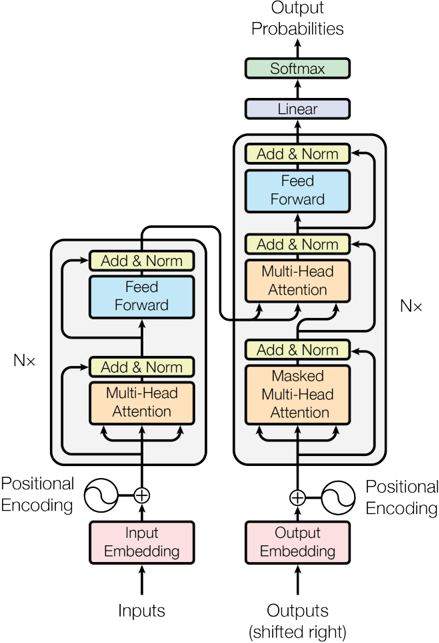

In [3]:
## ImageNode
resource = MediaResource(
    path=Path("resources/1706.03762v7_sample-picture-1.png"),
)
node = ImageNode(
    image_resource=resource,
    caption="This is a sample image",
)
print(node.caption)
print(node.get_type())
print("Before:", node.image_data)
node.load_image_data()
print("After:", node.image_data[:10])
node.image

# Document

In [4]:
## document with some image
nodes = [
    TextNode(text="Hello, world!"),
    # TextNode(text="Hello, world!"),
    ImageNode(image_resource=resource),
    TableNode(image_resource=resource, table_type=TableType.MARKDOWN),
]
document = Document(nodes=nodes)
print(document)

id_='943df422-a5bb-4e87-ba67-154a11285b58' metadata={} nodes=[TextNode(id_='a5f3b9ea-72af-45d9-a266-40c1c3e70ddb', metadata={}, text_type=<TextType.PLAIN: '1'>, label=<TextLabel.PLAIN: '1'>, resource=MediaResource(data=None, text='Hello, world!', path=None, url=None, mimetype=None)), ImageNode(id_='939874e3-db88-4cb6-9e88-300354a02042', metadata={}, image_loaded=True, image_resource=MediaResource(data=b'iVBORw0KGgoAAAANSUhEUgAAAbcAAAKDCAIAAAAW9tOaAAEAAElEQVR4nOyddXgVRxeHZ2Z3r8XdXQkQCO7u7k5xKVK0FCilpUChUFo+CsWKFikuxa24Q4AQCEmIEHe9ursz3x8LaQjaQpR5H3ie3N3N7Lk39/7umTlnzoGEEEChUP4NBoPh9OnTt2/fzs7Olslk3t7erVq18vDwKG27KMUCKm0DKJRyRmxsbI8ePaZPny6KYmBgoLOz8/79+7t06fLHH3+85wi3bt365ZdfPooxt2/fXrBggSiKH2U0ymthS9sACqU8kZ6ePmDAgMDAwK1bt1paWkoHx48ff/jw4YkTJ3Ic169fv3cOkpSUdP369Y9iT1JS0qVLl2bOnPlRRqO8FqqSFMq/YP369TKZ7Ndff2XZfz47CKFu3bplZmb+9NNPzZo1s7e353keAMBxXME1GGNBEDiOy8nJ0Wg0AIDMzEyFQqFSqQwGg0wmI4TExcWp1WqlUunq6orQ83meIAiEkCJD8Twvk8ny8/PVajWEMCMjw9jY2MjIqIRehU8MOuOmUN6X/Pz8DRs2TJgwobBEFjBw4EC9Xn/+/

In [5]:
nodes[-1].get_table_type()

<TableType.MARKDOWN: '2'>

In [6]:
doc_json = doc_to_json(document)
print(json.dumps(doc_json, indent=4))

{
    "__data__": {
        "id_": "943df422-a5bb-4e87-ba67-154a11285b58",
        "metadata": {},
        "nodes": [
            {
                "id_": "a5f3b9ea-72af-45d9-a266-40c1c3e70ddb",
                "metadata": {},
                "text_type": "1",
                "label": "1",
                "resource": {
                    "text": "Hello, world!",
                    "path": null,
                    "url": null,
                    "mimetype": null
                },
                "class_name": "TextNode"
            },
            {
                "id_": "939874e3-db88-4cb6-9e88-300354a02042",
                "metadata": {},
                "image_loaded": true,
                "image_resource": {
                    "text": null,
                    "path": "resources/1706.03762v7_sample-picture-1.png",
                    "url": null,
                    "mimetype": "image/png",
                    "data": "aVZCT1J3MEtHZ29BQUFBTlNVaEVVZ0FBQWJjQUFBS0RDQUlBQUFBVzl0

In [7]:
doc = json_to_doc(doc_json)
print(doc)

id_='943df422-a5bb-4e87-ba67-154a11285b58' metadata={} nodes=[TextNode(id_='a5f3b9ea-72af-45d9-a266-40c1c3e70ddb', metadata={}, text_type=<TextType.PLAIN: '1'>, label=<TextLabel.PLAIN: '1'>, resource=MediaResource(data=None, text='Hello, world!', path=None, url=None, mimetype=None)), ImageNode(id_='939874e3-db88-4cb6-9e88-300354a02042', metadata={}, image_loaded=True, image_resource=MediaResource(data=b'iVBORw0KGgoAAAANSUhEUgAAAbcAAAKDCAIAAAAW9tOaAAEAAElEQVR4nOyddXgVRxeHZ2Z3r8XdXQkQCO7u7k5xKVK0FCilpUChUFo+CsWKFikuxa24Q4AQCEmIEHe9ursz3x8LaQjaQpR5H3ie3N3N7Lk39/7umTlnzoGEEEChUP4NBoPh9OnTt2/fzs7Olslk3t7erVq18vDwKG27KMUCKm0DKJRyRmxsbI8ePaZPny6KYmBgoLOz8/79+7t06fLHH3+85wi3bt365ZdfPooxt2/fXrBggSiKH2U0ymthS9sACqU8kZ6ePmDAgMDAwK1bt1paWkoHx48ff/jw4YkTJ3Ic169fv3cOkpSUdP369Y9iT1JS0qVLl2bOnPlRRqO8FqqSFMq/YP369TKZ7Ndff2XZfz47CKFu3bplZmb+9NNPzZo1s7e353keAMBxXME1GGNBEDiOy8nJ0Wg0AIDMzEyFQqFSqQwGg0wmI4TExcWp1WqlUunq6orQ83meIAiEkCJD8Twvk8ny8/PVajWEMCMjw9jY2MjIqIRehU8MOuOmUN6X/Pz8DRs2TJgwobBEFjBw4EC9Xn/+/

In [8]:
# # Serialize
# serialized = json.dumps(document.to_dict(), indent=4)
# print("Serialized JSON:")
# print(serialized)

# # Deserialize
# deserialized = Document.from_dict(json.loads(serialized))
# print("\nDeserialized Document:")
# print(deserialized)

In [9]:
# deserialized